# Depthwise convolution

Big thanks w/ code [christianversloot](https://github.com/christianversloot/machine-learning-articles)

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [5]:
(image_width, image_height) = (28, 28)
batch_size = 250
number_of_epochs = 25
number_of_classes = 10
validation_split = 0.2
verbosity = 1

In [6]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
input_train = input_train.reshape(input_train.shape[0], image_width, image_height, 1)
input_test = input_test.reshape(input_test.shape[0], image_width, image_height, 1)
input_shape = (image_width, image_height, 1)

In [8]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [9]:
input_train /= 255
input_test /= 255

In [10]:
target_train = tf.keras.utils.to_categorical(target_train, number_of_classes)
traget_test = tf.keras.utils.to_categorical(target_test, number_of_classes)

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [13]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [14]:
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=number_of_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/25
192/192 [==============================] - 13s 9ms/step - loss: 0.3603 - accuracy: 0.8905 - val_loss: 0.0947 - val_accuracy: 0.9710
Epoch 2/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0967 - accuracy: 0.9701 - val_loss: 0.0647 - val_accuracy: 0.9814
Epoch 3/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0691 - accuracy: 0.9779 - val_loss: 0.0534 - val_accuracy: 0.9852
Epoch 4/25
192/192 [==============================] - 1s 8ms/step - loss: 0.0560 - accuracy: 0.9821 - val_loss: 0.0436 - val_accuracy: 0.9872
Epoch 5/25
192/192 [==============================] - 2s 8ms/step - loss: 0.0482 - accuracy: 0.9849 - val_loss: 0.0350 - val_accuracy: 0.9902
Epoch 6/25
192/192 [==============================] - 1s 8ms/step - loss: 0.0416 - accuracy: 0.9875 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 7/25
192/192 [==============================] - 1s 8ms/step - loss: 0.0341 - accuracy: 0.9888 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch

# Separable convolutions

In [18]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D

In [19]:
(image_width, image_height) = (28, 28)
batch_size = 250
number_of_epochs = 25
number_of_classes = 10
validation_split = 0.2
verbosity = 1

In [20]:
(input_train, target_train), (input_test, target_test) = mnist.load_data()

In [21]:
input_train = input_train.reshape(input_train.shape[0], image_width, image_height, 1)
input_test = input_test.reshape(input_test.shape[0], image_width, image_height, 1)
input_shape = (image_width, image_height, 1)

In [22]:
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [23]:
input_train /= 255
input_test /= 255

In [25]:
target_train = tf.keras.utils.to_categorical(target_train, number_of_classes)
target_test = tf.keras.utils.to_categorical(target_test, number_of_classes)

In [30]:
model = Sequential()
model.add(SeparableConv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(SeparableConv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(number_of_classes, activation='softmax'))

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_2 (Separab  (None, 26, 26, 32)       73        
 leConv2D)                                                       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 separable_conv2d_3 (Separab  (None, 11, 11, 64)       2400      
 leConv2D)                                                       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [34]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
model.fit(input_train, target_train,
          batch_size=batch_size,
          epochs=number_of_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/25
192/192 [==============================] - 3s 12ms/step - loss: 0.5885 - accuracy: 0.8297 - val_loss: 0.2017 - val_accuracy: 0.9417
Epoch 2/25
192/192 [==============================] - 2s 10ms/step - loss: 0.1892 - accuracy: 0.9416 - val_loss: 0.1224 - val_accuracy: 0.9641
Epoch 3/25
192/192 [==============================] - 2s 10ms/step - loss: 0.1343 - accuracy: 0.9574 - val_loss: 0.0930 - val_accuracy: 0.9715
Epoch 4/25
192/192 [==============================] - 2s 11ms/step - loss: 0.1094 - accuracy: 0.9651 - val_loss: 0.0849 - val_accuracy: 0.9727
Epoch 5/25
192/192 [==============================] - 2s 10ms/step - loss: 0.0933 - accuracy: 0.9702 - val_loss: 0.0689 - val_accuracy: 0.9782
Epoch 6/25
192/192 [==============================] - 2s 11ms/step - loss: 0.0794 - accuracy: 0.9750 - val_loss: 0.0743 - val_accuracy: 0.9786
Epoch 7/25
192/192 [==============================] - 2s 10ms/step - loss: 0.0715 - accuracy: 0.9770 - val_loss: 0.0625 - val_accuracy: 0.9816

# Summary

As you can see differences between these layers:


1.   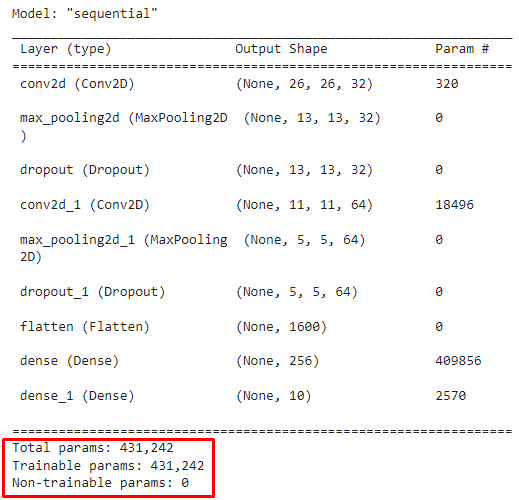
2.   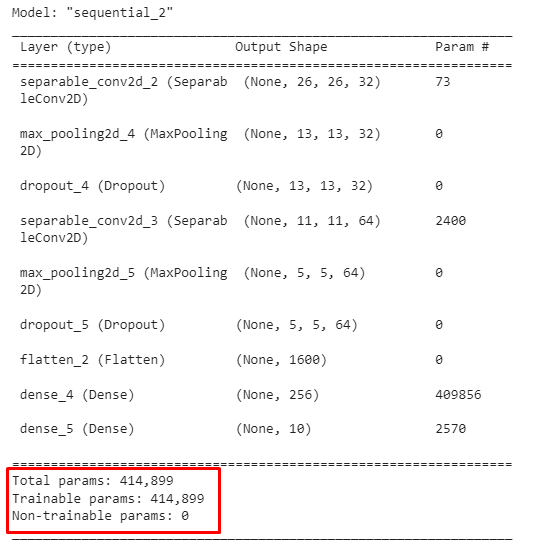

